## Activity 1

You've received a trajectory file from your colleague, who conducted a simulation on $H_2O$. He's now eager to adsorb these water molecules onto a Ni (1,1,1) surface for exploration of their properties. Leverage ASE to effortlessly craft the necessary geometry, and then save it as a POSCAR file. This way, you can seamlessly hand it over to him, empowering him to conduct the subsequent simulations. Minimum distance of the water molecules from the surface is to be 1.5 $A^{\circ}$

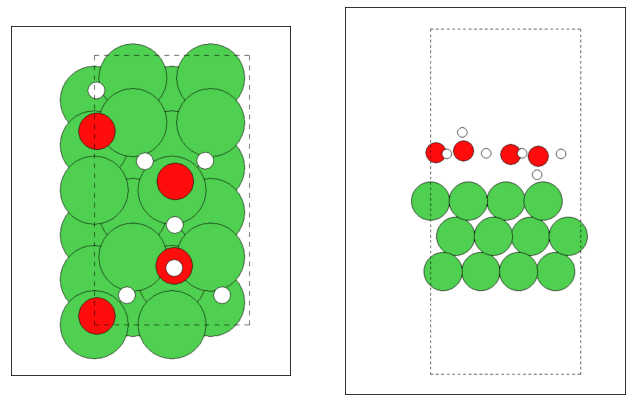

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

rcParams['figure.figsize'] = 11 ,8

img_A = mpimg.imread('z.png')
img_B = mpimg.imread('x.png')
W.positions[:, 2].min()

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[1].imshow(img_B)

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])

plt.show()

In [20]:
import ase
from ase.visualize import view
from ase.io import read
from ase.build import fcc111

In [21]:
W = read('WL.traj')
slab = fcc111('Ni', size=[2, 4, 3], a=3.55, orthogonal=True)

In [22]:
view(W)

In [23]:
view(slab)

In [5]:
W.set_cell([W.get_cell()[1,1],W.get_cell()[0,0],0.0])
W.rotate(90, 'z', center=(0, 0, 0))

for i in range(len(W.positions)):
    x=W.get_positions()[i][0]
    if x<0:
        W.positions[i][0] = W.cell[0][0]+W.positions[i][0]

W.set_cell(slab.cell, scale_atoms=True)
zmin = W.positions[:, 2].min()
W.positions += (0, 0, - zmin + 1.5)
W.translate((0,0,slab.positions[:,2].max()))

In [6]:
interface = slab + W
interface.set_cell([W.get_cell()[0,0],W.get_cell()[1,1],15])
interface.center(axis=2)
view(interface)
interface.write('POSCAR',format='vasp')

## ------------------------------------------------------------ END -------------------------------------------------------------

## Activity 2

My surface is **monolayer graphene**. I want to add a layer of water as adsorbate at a height of 3.31 $A^{\circ}$ from top of the slab; Coverage = 24/72. Required image is as shown below

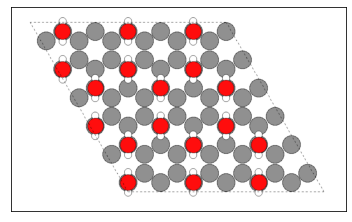

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4
img = mpimg.imread('gra_h2o.png')
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [35]:
import numpy as np
import ase.io
import ase.build
from ase.visualize import view
from ase.build import add_adsorbate
from ase import Atoms

slab = ase.build.graphene(formula='C2',a=2.46,size=(6,6,1))
slab.center()    
water = ase.build.molecule('H2O')
h = 3.31

In [1]:
positions =slab.positions
a=slab.positions[:,1].min()
index=[]
for i in range(len(slab)):
    if slab[i].position[1]==a:
        index.append(i)

start_index=index[::2]

for i in start_index:
    x = (slab[i].position[0])
    y = (slab[i].position[1])
    add_adsorbate(slab, adsorbate=water, height=h, position=(x,y), offset=None, mol_index=0)
    
    for j in range(i,len(slab.positions)):
        dist=((slab[j].position[0]-slab[i].position[0])**2+(slab[j].position[1]-slab[i].position[1])**2)**0.5
        
        if 2.84<dist<2.842:
            x = (slab[j].position[0])
            y = (slab[j].position[1])
            add_adsorbate(slab, adsorbate=water, height=h, position=(x,y), offset=None, mol_index=0)
            i=j
        continue

view(slab)
lat = 6*np.array([[2.46,0,0],[-2.46/2,(3**0.5)*(2.46/2),0],[0,0,1]])
slab.set_cell(lat)
slab.write('POSCAR_GRAPHENE',format='vasp')

NameError: name 'slab' is not defined

## ------------------------------------------------------------ END -------------------------------------------------------------

## Activity 3

Generate a twisted bilayer graphene nano ribbon of dimensions 10 nm x 5 nm. Relative twist angle is to be $10^{\circ}$. Ensure AA stacking. Step 1 has been done for you.   

Desired results:


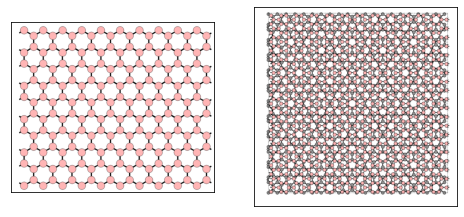

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
rcParams['figure.figsize'] = 8 ,8
img_A = mpimg.imread('monolayer_graphene.png')
img_B = mpimg.imread('bilayer_graphene.png')
print("Desired results:")
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
plt.show()

In [11]:
import os
import numpy as np
import ase
import ase.io
import ase.build
import ase.visualize
import math
from ase import Atoms
from ase.build import cut
from ase.build import stack
from ase.build import rotate
from ase.visualize import view

In [12]:
a=1.42
a1=(2*a*math.cos(math.pi/6))
a2=3*a
d=3.35
th = 30
lx = 100
ly = 50

In [14]:
atoms1=Atoms(
symbols='C4',
positions=[(0,0,0),(a1/2,a2/6,0),(a1/2,a2/2,0),(0,2*a2/3,0)],
cell=[(a1,0,0),(0,a2,0),(0,0,3.35)],
pbc=[1,0,0]
)
atoms2=Atoms(
symbols='B4',
positions=[(0,0,0),(a1/2,a2/6,0),(a1/2,a2/2,0),(0,2*a2/3,0)],
cell=[(a1,0,0),(0,a2,0),(0,0,3.35)],
pbc=[1,0,0]
)
    
layer1=atoms1*[lx,ly,1]
layer2=atoms2*[3*lx,3*ly,1]
layer2.translate([-lx*a1,-ly*a2,d])
    
    
layer2.rotate(th,'z', center=(0,a,d), rotate_cell=False)
bilayer = layer1 + layer2

pos = np.array(bilayer.get_positions())
indices = [atom.index for atom in bilayer]
del_index1 = []
del_index2 = []
del_index3 = []
del_index4 = []

for i in indices:
    if pos[i][0]>lx:
        del_index1.append(i)
    if pos[i][0]<0:
        del_index2.append(i)
    if pos[i][1]>ly:
        del_index3.append(i)
    if pos[i][1]<0:
        del_index4.append(i)
            
del_index = del_index1+del_index2+del_index3+del_index4
del_index = [*set(del_index)] # Removes duplicates from the lists

del bilayer [del_index]
    
bilayer.set_cell([lx,ly,15])
view(bilayer)

## ------------------------------------------------------------ END -------------------------------------------------------------